In [1]:
import os
import random
import shutil
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
annotation_path = r"D:\VIT\Cap-Stone\AI_Based_Real-Time_Illegal_Parking_Detection_with_Dynamic_Customization_of_No-Parking_Zones\datasets\vehicles\Final_MIx_Annotation\obj_train_data\Final_Mix"
image_path = r"D:\VIT\Cap-Stone\AI_Based_Real-Time_Illegal_Parking_Detection_with_Dynamic_Customization_of_No-Parking_Zones\datasets\vehicles\Final_Mix_Images"
output_path = r"D:\VIT\Cap-Stone\AI_Based_Real-Time_Illegal_Parking_Detection_with_Dynamic_Customization_of_No-Parking_Zones\datasets\vehicles\Final_Mix_Data_Splitted"
class_file = r"D:\VIT\Cap-Stone\AI_Based_Real-Time_Illegal_Parking_Detection_with_Dynamic_Customization_of_No-Parking_Zones\datasets\vehicles\Final_MIx_Annotation\obj.names"

In [3]:
splits = ['train', 'test', 'val']
for split in splits:
    os.makedirs(os.path.join(output_path, split, 'images'), exist_ok=True)
    os.makedirs(os.path.join(output_path, split, 'labels'), exist_ok=True)

In [4]:
annotation_files = [f for f in os.listdir(annotation_path) if f.endswith('.txt')]

In [5]:
total_files = len(annotation_files)
train_size = int(total_files * 0.7)  # 70%
test_size = int(total_files * 0.2)   # 20%
val_size = total_files - train_size - test_size  # 10%

In [6]:
random.shuffle(annotation_files)
train_files = annotation_files[:train_size]
test_files = annotation_files[train_size:train_size + test_size]
val_files = annotation_files[train_size + test_size:]

In [7]:
def copy_files(file_list, split_type):
    img_count = 0
    label_count = 0
    class_counts = Counter()
    
    for anno_file in file_list:
        src_anno = os.path.join(annotation_path, anno_file)
        dst_anno = os.path.join(output_path, split_type, 'labels', anno_file)
        shutil.copy2(src_anno, dst_anno)
        label_count += 1
        
        img_name = os.path.splitext(anno_file)[0] + '.jpg'
        src_img = os.path.join(image_path, img_name)
        dst_img = os.path.join(output_path, split_type, 'images', img_name)
        if os.path.exists(src_img):
            shutil.copy2(src_img, dst_img)
            img_count += 1

        with open(src_anno, 'r') as f:
            for line in f:
                class_id = int(line.split()[0])
                class_counts[class_id] += 1
    
    return img_count, label_count, class_counts

In [8]:
train_img_count, train_label_count, train_class_counts = copy_files(train_files, 'train')
test_img_count, test_label_count, test_class_counts = copy_files(test_files, 'test')
val_img_count, val_label_count, val_class_counts = copy_files(val_files, 'val')

In [9]:
with open(class_file, 'r') as f:
    class_names = [line.strip() for line in f.readlines()]

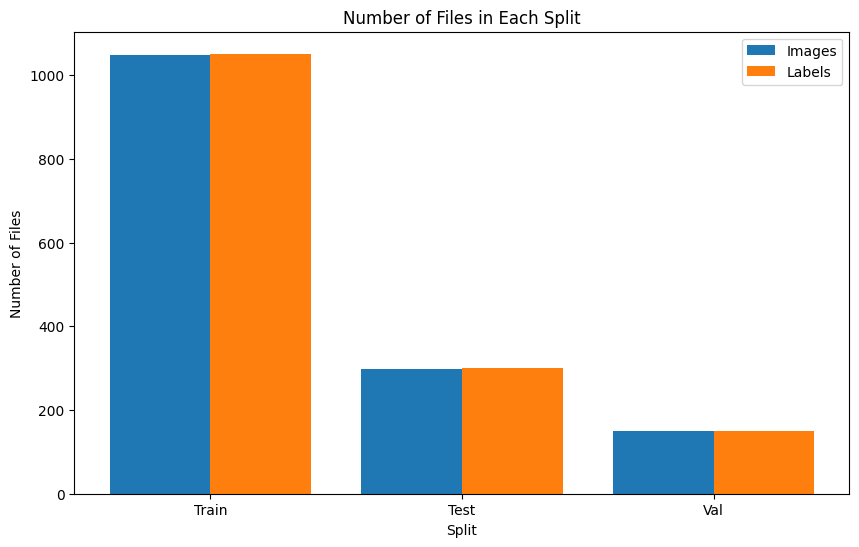

In [10]:
plt.figure(figsize=(10, 6))
splits = ['Train', 'Test', 'Val']
img_counts = [train_img_count, test_img_count, val_img_count]
label_counts = [train_label_count, test_label_count, val_label_count]

x = range(len(splits))
plt.bar(x, img_counts, width=0.4, label='Images', align='center')
plt.bar([i + 0.4 for i in x], label_counts, width=0.4, label='Labels', align='center')
plt.xlabel('Split')
plt.ylabel('Number of Files')
plt.title('Number of Files in Each Split')
plt.xticks([i + 0.2 for i in x], splits)
plt.legend()
plt.show()

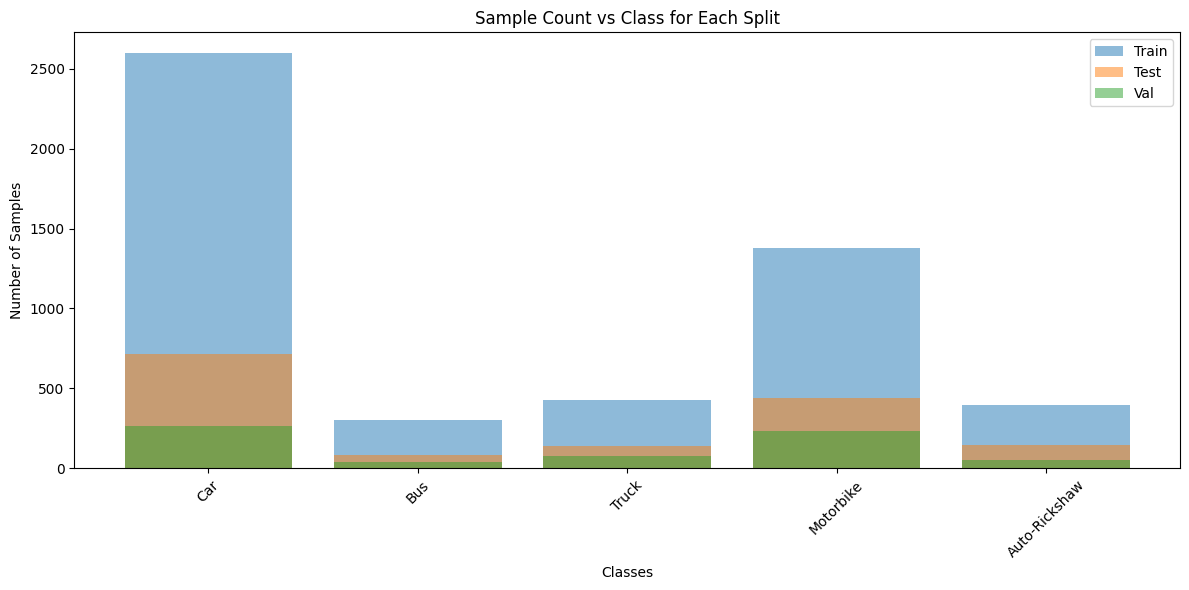

In [11]:
plt.figure(figsize=(12, 6))
for split, counts in [('Train', train_class_counts), ('Test', test_class_counts), ('Val', val_class_counts)]:
    class_ids = list(counts.keys())
    class_labels = [class_names[i] for i in class_ids]
    class_counts = list(counts.values())
    
    plt.bar(class_labels, class_counts, alpha=0.5, label=split)

plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.title('Sample Count vs Class for Each Split')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [12]:
print(f"Train: {train_img_count} images, {train_label_count} labels")
print(f"Test: {test_img_count} images, {test_label_count} labels")
print(f"Val: {val_img_count} images, {val_label_count} labels")

Train: 1048 images, 1051 labels
Test: 299 images, 300 labels
Val: 151 images, 151 labels
